# Data Loading and Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

#### Read & visualize data

In [57]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

Let's dig deeper & understand our data

In [58]:
rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} rows and {columns} columns.')

There are 1338 rows and 7 columns.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
for col in df.columns:
    x = df[col].value_counts()
    print("Column name:",col," has different values of:",x.count())
    print("==========================================================")

Column name: age  has different values of: 47
Column name: sex  has different values of: 2
Column name: bmi  has different values of: 548
Column name: children  has different values of: 6
Column name: smoker  has different values of: 2
Column name: region  has different values of: 4
Column name: charges  has different values of: 1337


In [62]:
df.drop_duplicates(inplace=True)

#### Distribution of charges



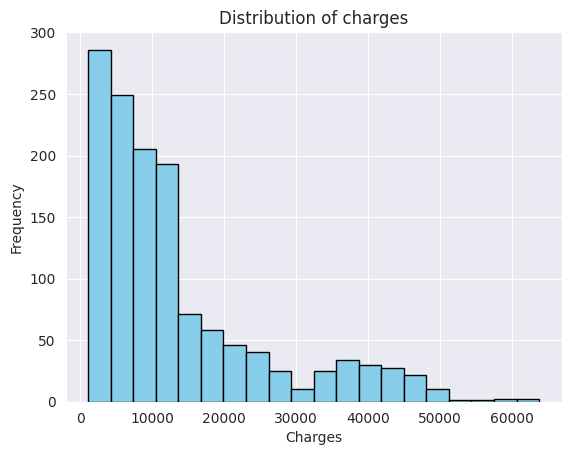

In [63]:
sns.set_style('darkgrid')
plt.hist(df['charges'],bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

#### Correlation between smoking and cost of treatment


In [64]:
df_smokers = df[df['smoker']=='yes']
df_non_smokers = df[df['smoker']=='no']
print(f'There are {df_smokers.shape[0]} smokers and {df_non_smokers.shape[0]} non-smokers.')

There are 274 smokers and 1063 non-smokers.


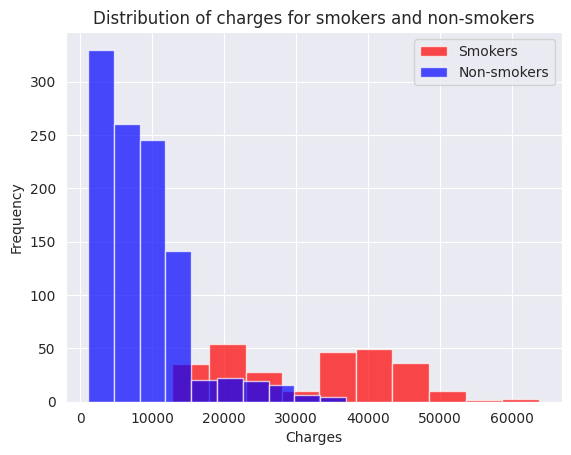

In [65]:
plt.hist(df_smokers['charges'],label='Smokers',color='red',alpha=0.7)
plt.hist(df_non_smokers['charges'],label='Non-smokers', color='blue',alpha=0.7)
plt.title('Distribution of charges for smokers and non-smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Correlation between age and cost of treatment


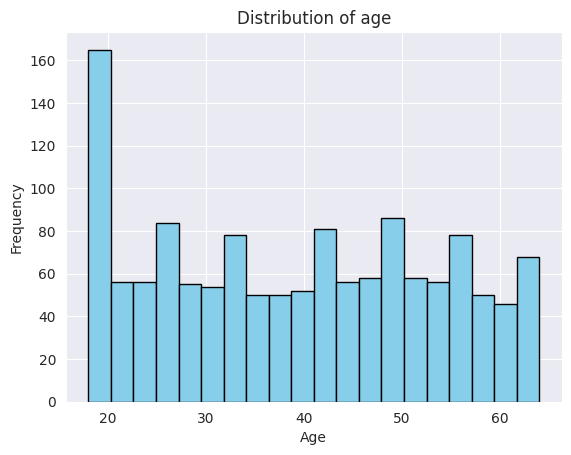

In [66]:
plt.hist(df['age'],bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

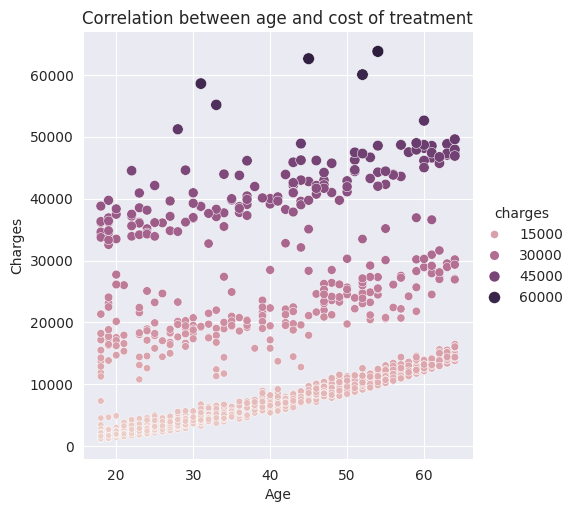

In [67]:
sns.set_palette('RdBu')
sns.relplot(x=df['age'],y=df['charges'],kind='scatter',size=df['charges'],hue=df['charges'])
plt.title('Correlation between age and cost of treatment')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Let's check if smoking also affects this curve.


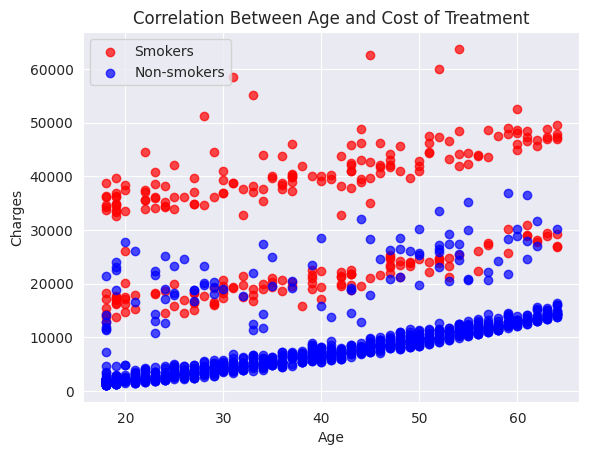

In [68]:
plt.scatter(df_smokers['age'], df_smokers['charges'], color='red', alpha=0.7, label='Smokers')
plt.scatter(df_non_smokers['age'], df_non_smokers['charges'], color='blue', alpha=0.7, label='Non-smokers')
plt.title('Correlation Between Age and Cost of Treatment')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

#### Correlation between BMI and cost of treatment

# Body Mass Index

![alt text](https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg)

# BMI Chart

![BMI char](https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg)




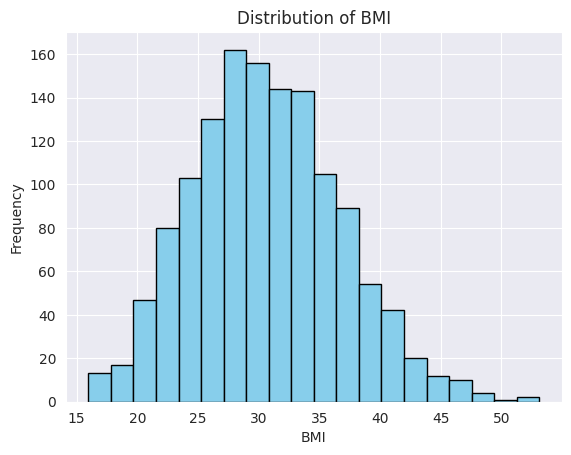

In [69]:
sns.set_style('darkgrid')
plt.hist(df['bmi'],bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.

In [70]:
df_obese = df[df['bmi']>=30]
df_overweight = df[(df['bmi']>=25) & (df['bmi']<30)]
df_healthy = df[(df['bmi']>=19) & (df['bmi']<25)]
df_underweight = df[df['bmi']<19]
print(f'There are {df_obese.shape[0]} obese, {df_overweight.shape[0]} overweight, {df_healthy.shape[0]} healthy, and {df_underweight.shape[0]} underweight.')

There are 704 obese, 385 overweight, 221 healthy, and 24 underweight.


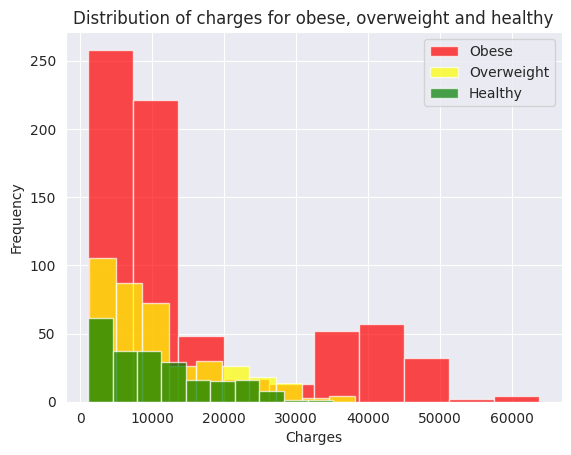

In [71]:
plt.hist(df_obese['charges'],label='Obese',color='red',alpha=0.7)
plt.hist(df_overweight['charges'],label='Overweight', color='yellow',alpha=0.7)
plt.hist(df_healthy['charges'],label='Healthy', color='green',alpha=0.7)
plt.title('Distribution of charges for obese, overweight and healthy')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Patients with BMI above 30 spend more on treatment!

#  Data Preprocessing
"Garbage in, garbage out".


In [72]:
df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


In [73]:
df.dropna(inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1334 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns


In [75]:
df.drop('region', axis=1, inplace=True)

#### Convert Categorical columns to numerical
Let's start with the sex column



In [76]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

And now the smokers column

In [77]:
df['smoker'] = df['smoker'].map({'no':0,'yes':1})

#### Z-scores

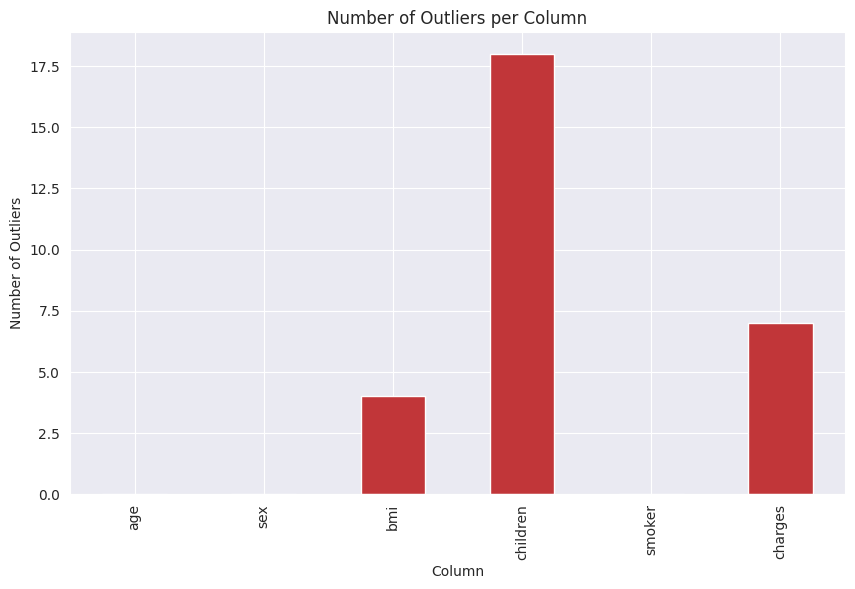

In [78]:
numeric_data = df.select_dtypes(include=[np.number])
z = 3
mean = numeric_data.mean()
std = numeric_data.std()
z_scores = (numeric_data - mean) / std
outliers = z_scores.abs() > z
outliers_count = outliers.sum()
plt.figure(figsize=(10, 6))
outliers_count.plot(kind='bar')
plt.title('Number of Outliers per Column')
plt.xlabel('Column')
plt.ylabel('Number of Outliers')
plt.show()

#### Correlation Matrix

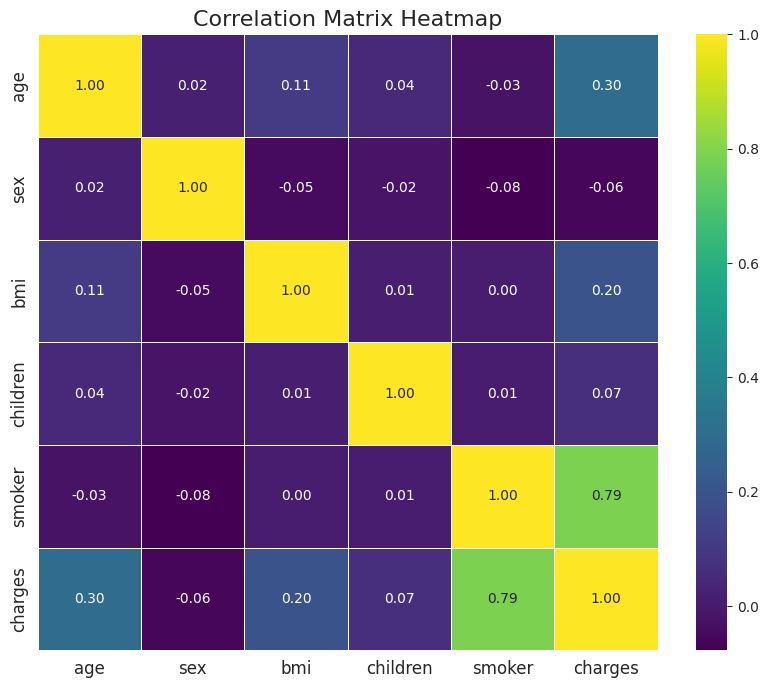

In [79]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Normalization

Let's scale all the columns by dividing by the maximum

In [80]:
data_max = df.max()

In [81]:
df = df.divide(data_max)
df.describe()

,age,sex,bmi,children,smoker,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.612678,0.495502,0.577103,0.219640,0.205397,0.208436
std,0.219403,0.500167,0.114875,0.241161,0.404143,0.190046
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.494942,0.000000,0.000000,0.074431
50%,0.609375,0.000000,0.571805,0.200000,0.000000,0.147227
75%,0.796875,1.000000,0.652997,0.400000,0.000000,0.262609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Regression Model Trainings



## Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.


In [82]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (1067, 5) (1067,)
Testing set shape: (267, 5) (267,)


## Linear Regression Model Training


In [83]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coefficients = linear_model.coef_
intercept = linear_model.intercept_
equation = f'charges = {intercept:.2f}'
print('The equation is :charges = a0 + a1 * age + a2 * sex + a3 * bmi + a4 * children + a5 * smoker')

for feature, coef in zip(X.columns, coefficients):
    equation += f' + {coef:.2f} * {feature}'

print('MultiLinear Regression Model Results:')
print(f'Equation: {equation}')
y_pred_linear = linear_model.predict(X_test)

The equation is :charges = a0 + a1 * age + a2 * sex + a3 * bmi + a4 * children + a5 * smoker
MultiLinear Regression Model Results:
Equation: charges = -0.18 + 0.26 * age + 0.00 * sex + 0.25 * bmi + 0.04 * children + 0.36 * smoker


####Evaluation using Scikit learn

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = linear_model.score(X_test, y_test)
print('Linear Regression Results:')
print(f'MAE: {mae_linear:.2f}')
print(f'MSE: {mse_linear:.2f}')
print(f'RMSE: {rmse_linear:.2f}')
print(f'R² Score: {r2_linear:.2f}')

Linear Regression Results:
MAE: 0.07
MSE: 0.01
RMSE: 0.10
R² Score: 0.79


####Making a prediction

In [85]:
first_sample = X_train.iloc[0:1]
predicted_normalized_linear = linear_model.predict(first_sample)
predicted_original_linear = predicted_normalized_linear[0] * data_max['charges']

print(f'Prediction Charge:{predicted_original_linear:.2f}$.')
actual_charge = y_train.iloc[0] * data_max['charges']
print(f"Actual medical charge: {actual_charge:.2f}$.")

Prediction Charge:7971.29$.
Actual medical charge: 8534.67$.


## Desicion Tree Model Training

In [86]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

####Evaluation using Scikit learn





In [87]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = dt_model.score(X_test, y_test)
print('Decision Tree Results:')
print(f'MAE: {mae_dt:.2f}')
print(f'MSE: {mse_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'R² Score: {r2_dt:.2f}')

Decision Tree Results:
MAE: 0.04
MSE: 0.01
RMSE: 0.07
R² Score: 0.89


####Making a prediction

In [88]:
predicted_normalized_dt = dt_model.predict(first_sample)
predicted_original_dt = predicted_normalized_dt[0] * data_max['charges']
print("Decision Tree Result:")
print(f'Prediction Charge:{predicted_original_dt:.2f}$.')
print(f"Actual medical charge: {actual_charge:.2f}$.")

Decision Tree Result:
Prediction Charge:11868.05$.
Actual medical charge: 8534.67$.


## Ridge Regression Model Training

In [89]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [90]:
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

ridge_equation = f'charges = {ridge_intercept:.2f}'
print('The equation is: charges = a0 + a1 * age + a2 * sex + a3 * bmi + a4 * children + a5 * smoker')

for feature, coef in zip(X.columns, ridge_coefficients):
    ridge_equation += f' + {coef:.2f} * {feature}'

print('Ridge Regression Model Results:')
print(f'Equation: {ridge_equation}')

The equation is: charges = a0 + a1 * age + a2 * sex + a3 * bmi + a4 * children + a5 * smoker
Ridge Regression Model Results:
Equation: charges = -0.17 + 0.25 * age + 0.00 * sex + 0.23 * bmi + 0.04 * children + 0.36 * smoker


####Evaluation using Scikit learn

In [91]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
r2_ridge = dt_model.score(X_test, y_test)

print('Ridge Regression Results:')
print(f'MAE: {ridge_mae:.2f}')
print(f'MSE: {ridge_mse:.2f}')
print(f'RMSE: {ridge_rmse:.2f}')
print(f'R² Score: {r2_ridge:.2f}')

Ridge Regression Results:
MAE: 0.07
MSE: 0.01
RMSE: 0.10
R² Score: 0.89


####Making a prediction

In [92]:
predicted_normalized_ridge = ridge_model.predict(first_sample)
predicted_original_ridge= predicted_normalized_ridge[0] * data_max['charges']
print("Decision Tree Result:")
print(f'Predicted Charge:{predicted_original_ridge:.2f}$.')
print(f"Actual medical charge: {actual_charge:.2f}$.")

Decision Tree Result:
Predicted Charge:8089.66$.
Actual medical charge: 8534.67$.


## Feature Importance for Regression Models

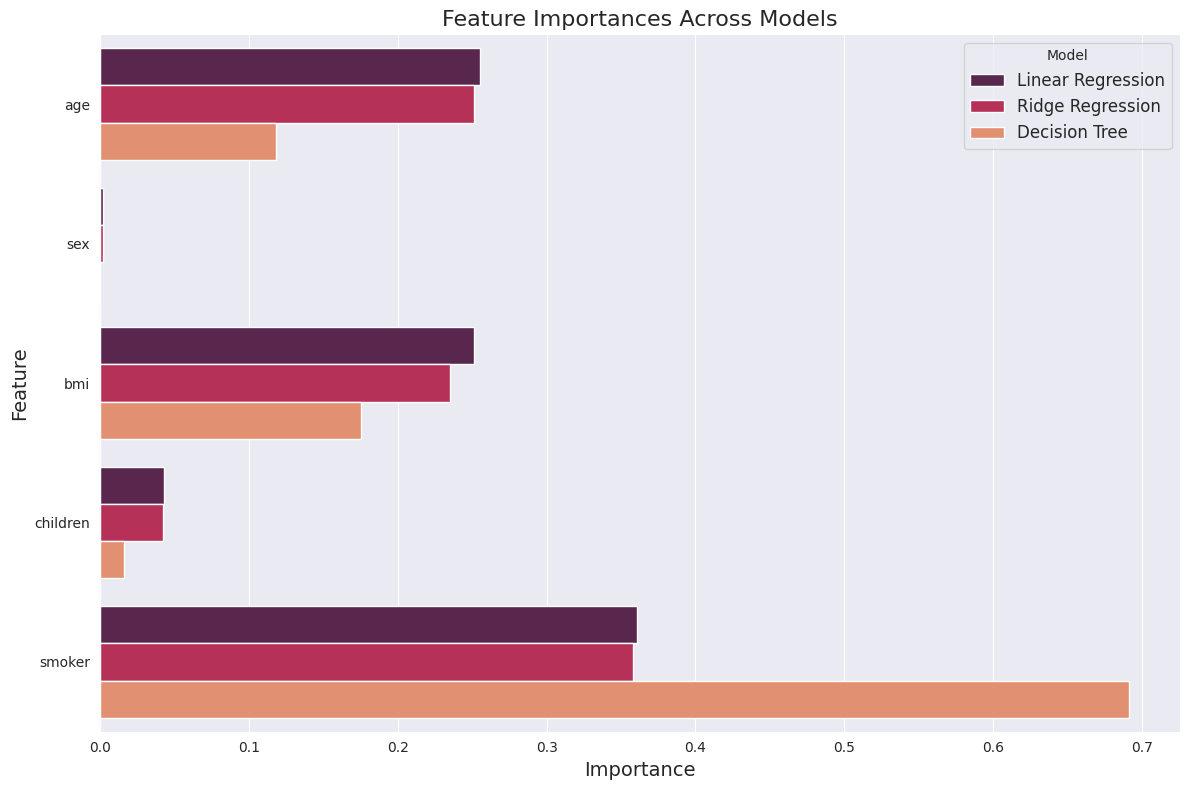

In [93]:
linear_coeffs = np.abs(linear_model.coef_)
ridge_coeffs = np.abs(ridge_model.coef_)
decision_tree_importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear Regression': linear_coeffs,
    'Ridge Regression': ridge_coeffs,
    'Decision Tree': decision_tree_importances
})

feature_importance_melted = feature_importance_df.melt(id_vars='Feature',
                                                       var_name='Model',
                                                       value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_melted, x='Importance', y='Feature', hue='Model', palette='rocket')
plt.title('Feature Importances Across Models', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## Regression Models Comparison

               Model       MAE       MSE      RMSE  R² Score
0  Linear Regression  0.067711  0.009626  0.098112  0.788034
1   Ridge Regression  0.067541  0.009727  0.098624  0.888743
2      Decision Tree  0.040125  0.005053  0.071081  0.888743


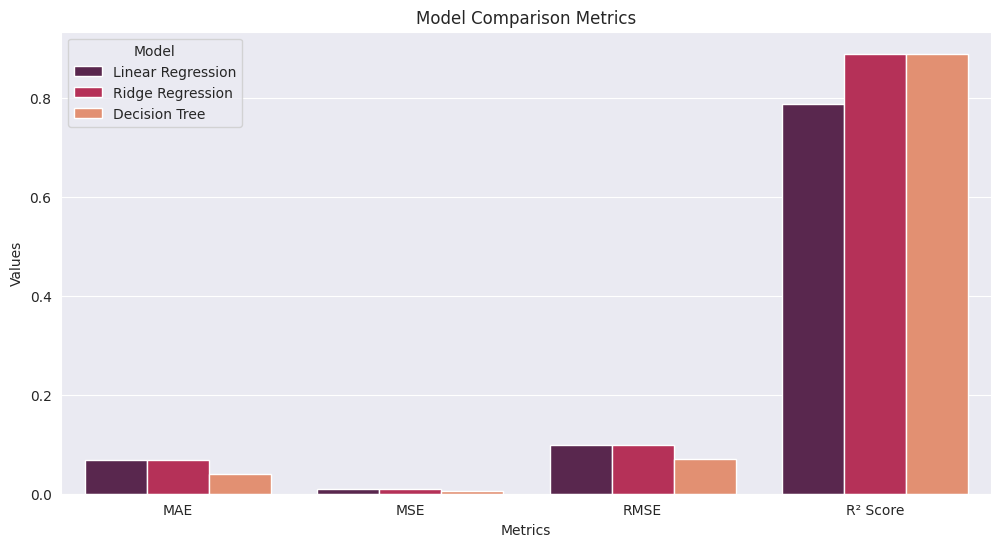

In [94]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "MAE": [mae_linear, ridge_mae, mae_dt],
    "MSE": [mse_linear, ridge_mse, mse_dt],
    "RMSE": [rmse_linear, ridge_rmse, rmse_dt],
    "R² Score": [r2_linear, r2_ridge, r2_dt]
})

print(results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results.melt(id_vars="Model"), x="variable", y="value", hue="Model", palette="rocket")
plt.title("Model Comparison Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.legend(title="Model")
plt.show()



# Classification Models Training


Now, we will predict based on all the features that we have if the person is smoker or not a smoker

## Data splits


In [95]:
X = df.drop('smoker', axis=1)
y = df['smoker']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', x_train.shape, y_train.shape)
print('Testing set shape:', x_test.shape, y_test.shape)

Training set shape: (1067, 5) (1067,)
Testing set shape: (267, 5) (267,)


##Logistic Regression Model Training

In [96]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred_logistic = logistic_model.predict(x_test)

####Making a prediction

In [97]:
first_sample = x_train.iloc[0:1]
actual_class = y_train.iloc[0]
log_prediction = logistic_model.predict(first_sample)[0]
log_probabilities = logistic_model.predict_proba(first_sample)[0]

print(f"Logistic Regression Prediction:")
print(f"The model predicts that the person is {'a smoker' if log_prediction == 1 else 'not a smoker'}.")
print(f"Probability of being a smoker: {log_probabilities[1]:.2f}")
print(f"Actual: {'Smoker' if actual_class == 1 else 'Non-smoker'}")

Logistic Regression Prediction:
The model predicts that the person is not a smoker.
Probability of being a smoker: 0.07
Actual: Non-smoker


####Evaluation using Scikit learn

In [98]:
logistic_accuracy = accuracy_score(y_test.values, y_pred_logistic)
print(f'Logistic Regression Accuracy: {logistic_accuracy * 100:.2f} %')

Logistic Regression Accuracy: 92.13 %


In [99]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       207
         1.0       0.95      0.68      0.80        60

    accuracy                           0.92       267
   macro avg       0.93      0.84      0.87       267
weighted avg       0.92      0.92      0.92       267



##Decision Tree Model Training

In [100]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

####Making a prediction

In [101]:
dt_prediction = dt_model.predict(first_sample)[0]
dt_probabilities = dt_model.predict_proba(first_sample)[0]

print(f"Decision Tree Prediction:")
print(f"The model predicts that the person is {'a smoker' if dt_prediction == 1 else 'not a smoker'}.")
print(f"Probability of being a smoker: {dt_probabilities[1]:.2f}")
print(f"Actual: {'Smoker' if actual_class == 1 else 'Non-smoker'}")

Decision Tree Prediction:
The model predicts that the person is not a smoker.
Probability of being a smoker: 0.00
Actual: Non-smoker


####Evaluation using Scikit learn

In [102]:
dt_accuracy = accuracy_score(y_test.values, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')

Decision Tree Accuracy: 97.75%


In [103]:
print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       207
         1.0       0.95      0.95      0.95        60

    accuracy                           0.98       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.98      0.98      0.98       267



##Random Forest Model Training

In [104]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

####Making a prediction

In [105]:
rf_prediction = rf_model.predict(first_sample)[0]
rf_probabilities = rf_model.predict_proba(first_sample)[0]

print(f"Random Forest Prediction:")
print(f"The model predicts that the person is {'a smoker' if rf_prediction == 1 else 'not a smoker'}.")
print(f"Probability of being a smoker: {rf_probabilities[1]:.2f}")
print(f"Actual: {'Smoker' if actual_class == 1 else 'Non-smoker'}")

Random Forest Prediction:
The model predicts that the person is not a smoker.
Probability of being a smoker: 0.00
Actual: Non-smoker


####Evaluation using Scikit learn

In [106]:
rf_accuracy = accuracy_score(y_test.values, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Accuracy: 97.00%


In [107]:
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       207
         1.0       0.92      0.95      0.93        60

    accuracy                           0.97       267
   macro avg       0.95      0.96      0.96       267
weighted avg       0.97      0.97      0.97       267



## Feature Importance for Classification Models

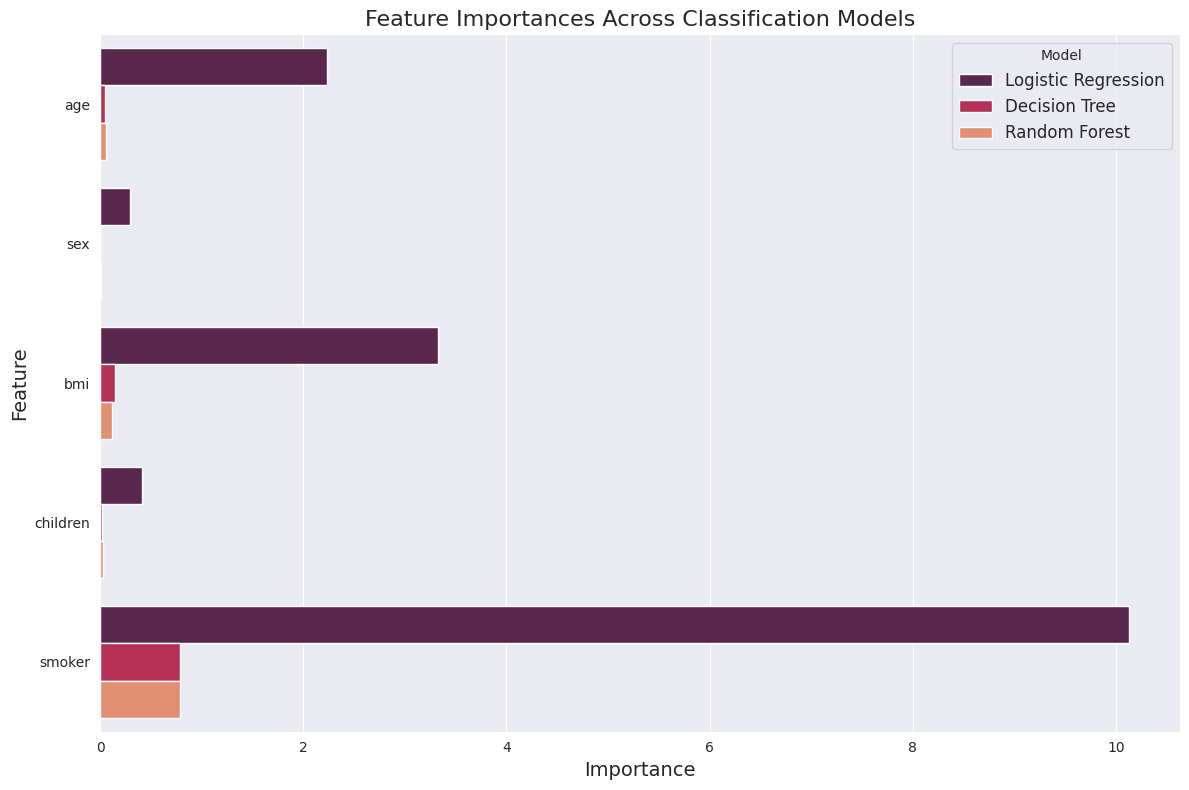

In [108]:
logistic_coeffs = np.abs(logistic_model.coef_[0])
decision_tree_importances = dt_model.feature_importances_

random_forest_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Logistic Regression': logistic_coeffs,
    'Decision Tree': decision_tree_importances,
    'Random Forest': random_forest_importances
})

feature_importance_melted = feature_importance_df.melt(id_vars='Feature',
                                                       var_name='Model',
                                                       value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_melted, x='Importance', y='Feature', hue='Model', palette='rocket')
plt.title('Feature Importances Across Classification Models', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()
plt.show()

## Classification Models Comparison

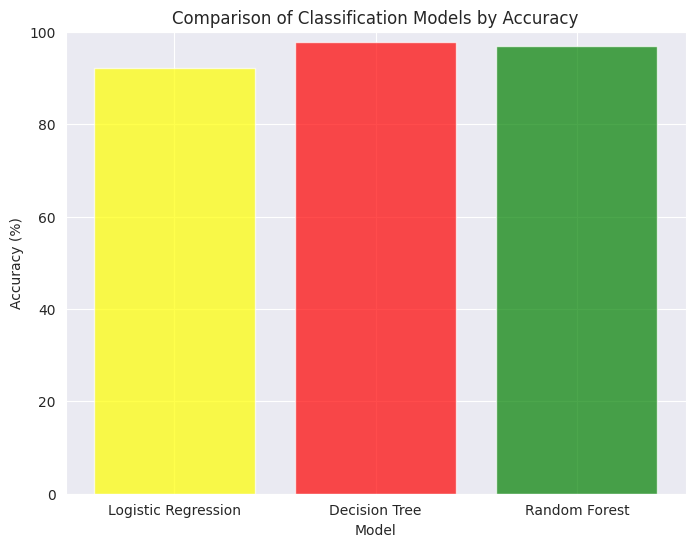

In [109]:
model_accuracies = {
    'Logistic Regression': logistic_accuracy * 100,
    'Decision Tree': dt_accuracy * 100,
    'Random Forest': rf_accuracy * 100
}

plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['yellow', 'red', 'green'],alpha=0.7)
plt.title('Comparison of Classification Models by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()